I want to do an EDA on a stock I have been looking at for a long time. Prospect Capital. It was one of the stocks I found when I first started investing. Due to my lack of financial knowledge, i was attracted to the stock's low price and monthly divdends. With my new data science and python skills, I want to answer the following questions:

1. Was Prospect Capital a good investment?
2. Was the better option to invest the market?

I expect that maybe Prospect Capital may not been a great investment on its own. Especially when compared to holding the overall market. Maybe Prospect Capital might work better in portfolio with a diverse set of stocks

First we will load the three years of data for both GSPC and Prospect Capital. After, we calculate the daily returns, annualized returns, moving averages, and voliaty for PSEC versus the market. We also do a VaR and CVaR calcualtion and compare the results between the two to get a better idea of the risk involved with both. Then we will look at the same metrics if we decided to have PSEC and GSPC in one portfolio.

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from scipy import stats
from scipy.stats import norm


In [3]:
ticker = "PSEC"
start_date = "2020-01-01"
end_date = "2023-01-01"
stock_data = yf.download(ticker, start=start_date, end=end_date)

ticker = "^GSPC"
start_date = "2020-01-01"
end_date = "2023-01-01"
market = yf.download(ticker, start=start_date, end=end_date)



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,6.47,6.50,6.46,6.48,4.505537,1726700
2020-01-03,6.46,6.52,6.45,6.48,4.505537,1570000
2020-01-06,6.48,6.49,6.45,6.47,4.498582,1085400
2020-01-07,6.47,6.51,6.46,6.47,4.498582,1106200
2020-01-08,6.46,6.50,6.46,6.46,4.491629,1207300


In [5]:
market.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,3244.669922,3258.139893,3235.530029,3257.850098,3257.850098,3459930000
2020-01-03,3226.360107,3246.149902,3222.340088,3234.850098,3234.850098,3484700000
2020-01-06,3217.550049,3246.840088,3214.639893,3246.280029,3246.280029,3702460000
2020-01-07,3241.860107,3244.909912,3232.429932,3237.179932,3237.179932,3435910000
2020-01-08,3238.590088,3267.070068,3236.669922,3253.050049,3253.050049,3726840000


PSEC adjusted close price for the past three years below

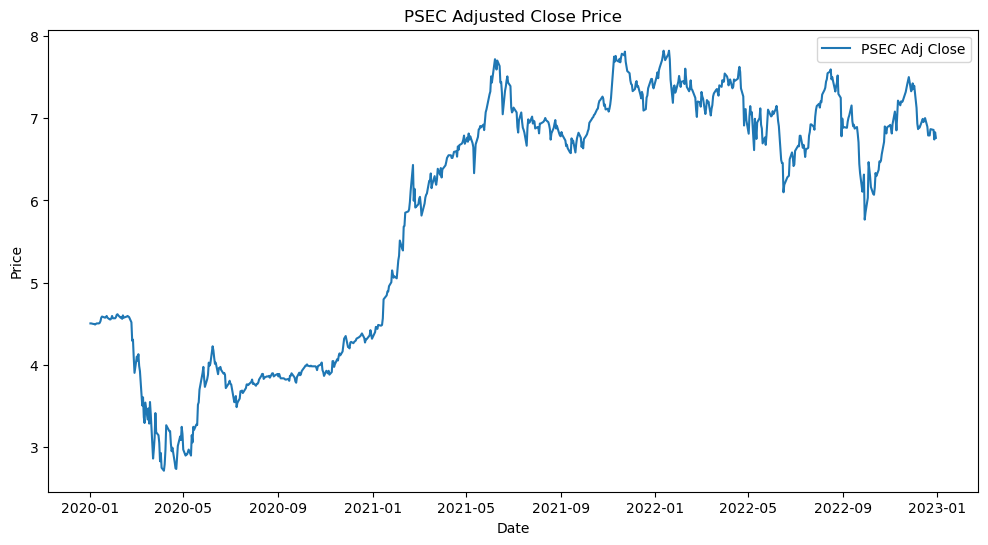

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Adj Close'], label='PSEC Adj Close')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('PSEC Adjusted Close Price')
plt.legend()
plt.show()

From this graph, I see that the adjusted price doesn't flucate much. I expect that the returns of PSEC should flucate much either. That was a massive rally in the market as a whole and should explain that sharp increase from 2020-09 to 2021-09

GSPC adjusted close price over the past three years below

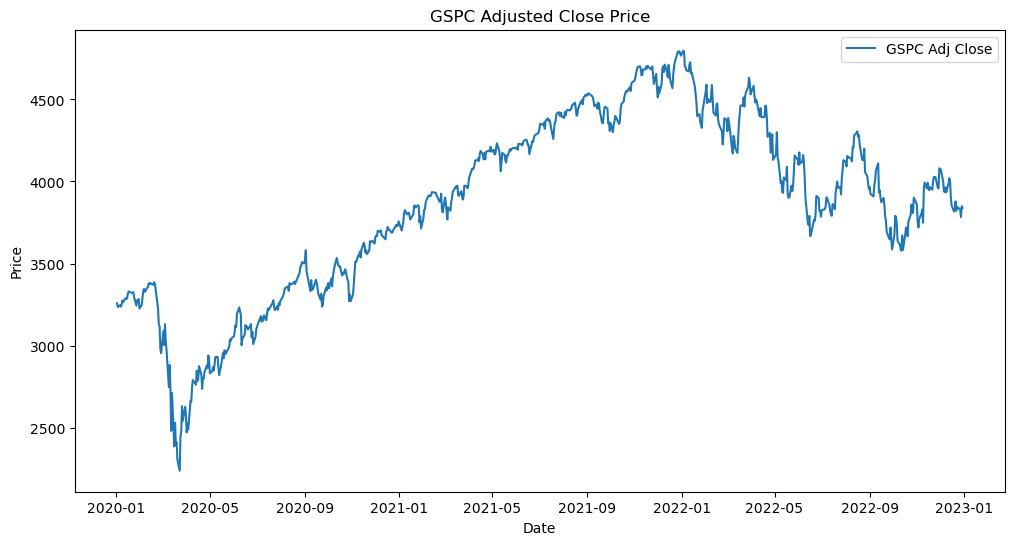

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(market['Adj Close'], label='GSPC Adj Close')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('GSPC Adjusted Close Price')
plt.legend()
plt.show()

As mentioned before, the market on a whole experienced a huge rally and would explain PSEC huge rally during that time. The only difference is that while PSEC price direction seems to flatten out, GSPC is showing signs of a sharp decline

We are going to calculate the following below:

1. Daily returns and annualized returns for PSEC and GSPC
2. Short and long Moving Averages for trends
3. 20 Day Volatility for PSEC and GSPC
4. Annualized Volatility for PSEC and GSPC

In [8]:
# Daily returns
stock_data['Daily_Returns'] = stock_data['Adj Close'].pct_change()
market['Daily_Returns'] = market['Adj Close'].pct_change()

#Annualized Returns using geometric mean
psec_daily_growth = 1 + stock_data['Daily_Returns']
geo_mean = np.prod(psec_daily_growth)**(1/len(psec_daily_growth))
psec_annual_ret = (geo_mean**252 - 1)*100


market_daily_growth = 1 + market['Daily_Returns']
market_geo_mean = np.prod(market_daily_growth)**(1/len(market_daily_growth))
market_annual_ret = (market_geo_mean**252 - 1)*100


# Moving averages
stock_data['20D_MA'] = stock_data['Adj Close'].rolling(window=20).mean()
stock_data['50D_MA'] = stock_data['Adj Close'].rolling(window=50).mean()
market['20D_MA'] = market['Adj Close'].rolling(window=20).mean()
market['50D_MA'] = market['Adj Close'].rolling(window=50).mean()

# Volatility (20-day)
stock_data['20D_Volatility'] = stock_data['Daily_Returns'].rolling(window=20).std()
market['20D_Volatility'] = market['Daily_Returns'].rolling(window=20).std()

#Annualized Volatility (252-day)
psec_annual_vol = (stock_data['Daily_Returns'].std() * np.sqrt(252)) * 100
market_annual_vol = (market['Daily_Returns'].std() * np.sqrt(252)) * 100



# Drop missing values (from moving average calculation)
stock_data.dropna(inplace=True)
market.dropna(inplace=True)

print(f'GSPC annual return is {market_annual_ret: .2f}% and GSPC annual volatility is {market_annual_vol: .2f}%')
print(f'PSEC annual return is {psec_annual_ret: .2f}% and PSEC annual volatility is {psec_annual_vol: .2f}%')


GSPC annual return is  5.63% and GSPC annual volatility is  25.46%
PSEC annual return is  14.49% and PSEC annual volatility is  33.45%


Based on the above numbers, PSEC is very risky to hold on its hold compared to the overall market during this three year timeframe. However, with PSEC greater risk means better returns that just the market. We are going to take a look at the following graphically for PSEC and GSPC:

1. Daily returns
2. Short and long moving averages with adjusted price 
3. 20 Day Volatility

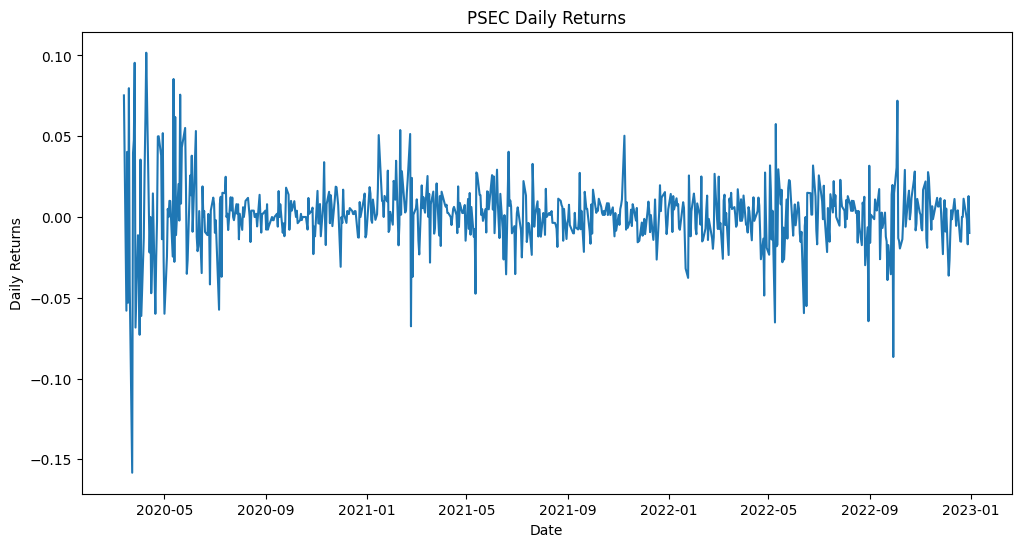

In [85]:
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Daily_Returns'])
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.title('PSEC Daily Returns')
plt.show()

PSEC daily Returns Above

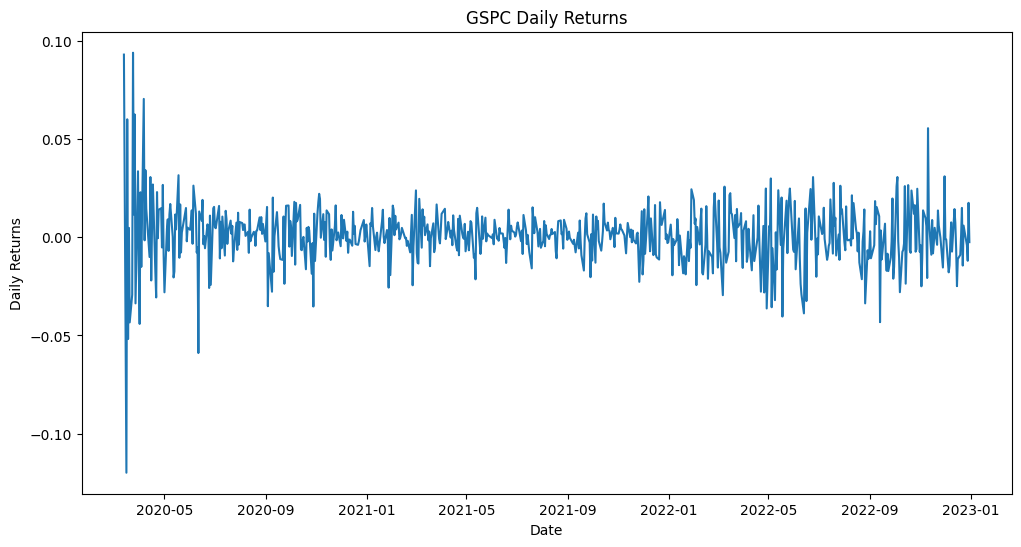

In [86]:
plt.figure(figsize=(12, 6))
plt.plot(market['Daily_Returns'])
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.title('GSPC Daily Returns')
plt.show()

GSPC returns above

GSPC returns looks more unifrom than PSEC. This probably explains the higher annualized volatility present in PSEC compared to GSPC

Next the 20 day volatility for both

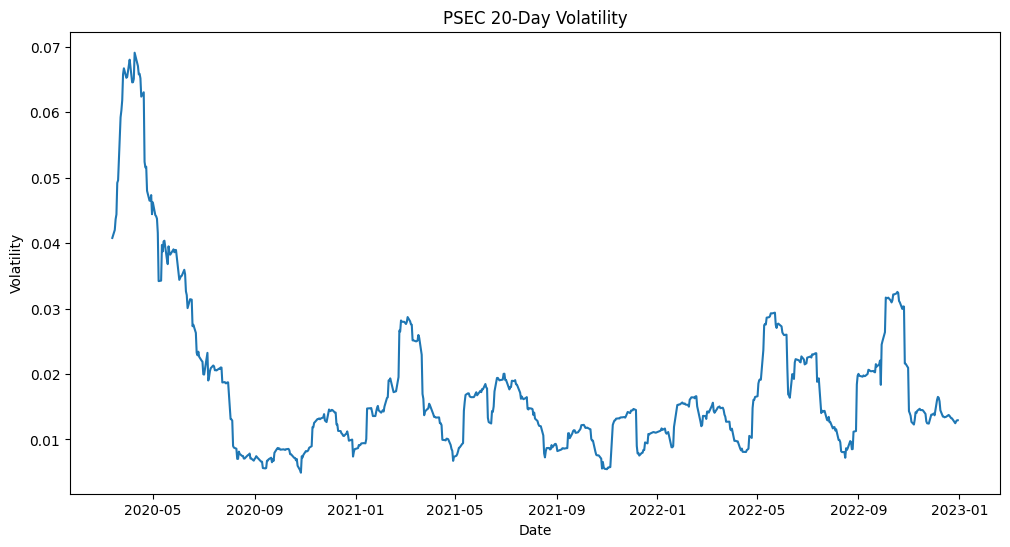

In [87]:
plt.figure(figsize=(12, 6))
plt.plot(stock_data['20D_Volatility'])
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.title('PSEC 20-Day Volatility')
plt.show()

PSEC 20 day Volatiltiy 

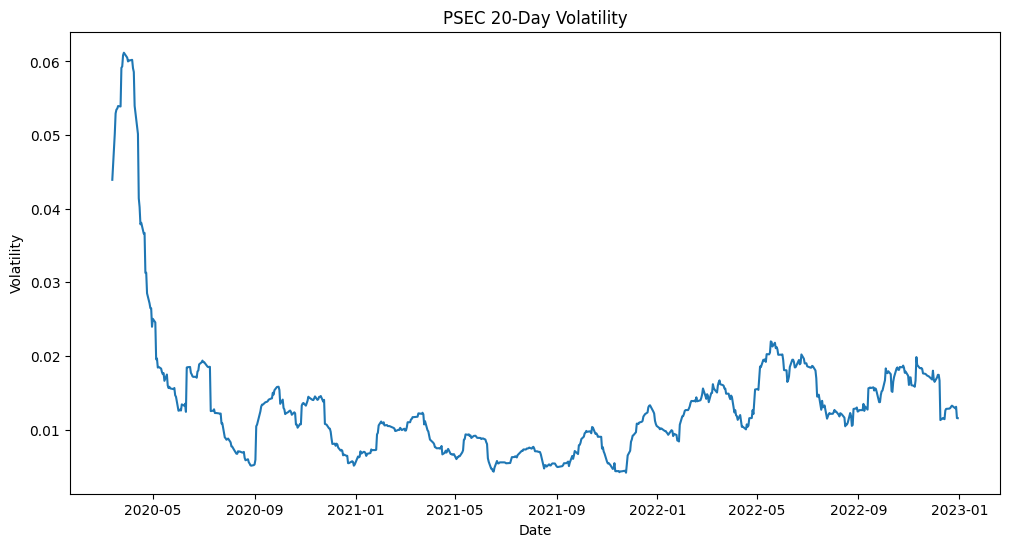

In [88]:
plt.figure(figsize=(12, 6))
plt.plot(market['20D_Volatility'])
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.title('PSEC 20-Day Volatility')
plt.show()

GSPC 20 day Volatility 

This time, PSEC's 20 day Vol is more uniform than GSPC. In fact, GSPC 20 day vol seems to be trending upwards. PSEC's seems to be a bit flat with a few peaks and valleys present 

We are now going to take a look one final metric VaR. What is the maximum loss that we will experience given a certain confidence level? I consider this metric important because I would like to know how much I can potentially lose when investing in anything. 

Lets calculate the VaR for PSEC and GSPC

In [90]:
psec_var_95 = norm.ppf(1 - 0.95, stock_data['Daily_Returns'].mean(), stock_data['Daily_Returns'].std()) * 100
market_var_95 = norm.ppf(1 - 0.95, market['Daily_Returns'].mean(), market['Daily_Returns'].std()) * 100

print(f'PSEC VaR is {psec_var_95:.2f}%')
print(f"GSPC VaR is {market_var_95:.2f}%")

PSEC VaR is -3.29%
GSPC VaR is -2.42%


Based on this calculation, Although PSEC may provide better returns, i stand to lose more with PSEC on compared to the market alone. With PSEC's volaitiy, there is a chance of experiencing a worst case scenario (beyond a 95% confidence level) and ultimately losing more moeny than if i wouldve held the market by itself. In this case, if i invested $1 million dollars, the maxiumum loss from a tail event is $32,900 with PSEC compared to $24,200 with just the market.

I think my next steps is to see if a portfolio containing the market and PSEC will yield better results in terms of returns and volatility.